### Import Packages

In [1]:
import re
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from lib import renders as rs
from lib.cluster import kmeans, find_best_cluster, feature_importance, plot_kmeans_cluster

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Import Data

In [2]:
file_loc = "data/2016-2017.csv"

In [3]:
data = pd.read_csv(file_loc)
data.head()

,Season,Player,Pos,Player_ID,Age,G,MP,PER,TS%,3PAr,...,16<3_FG%,3P%,%ASTd_2P,%FGA_DUNK,DUNKS,%ASTd_3P,%_CORNER3PA,3P%_CORNER3,HEAVE_ATT,HEAVE_MD
0,2016-17,A.J. Hammons,C,hammoaj01,24,17.0,77.0,9.7,0.455,0.273,...,0.500,0.667,0.800,0.091,2,1.000,0.167,0.000,0,0
1,2016-17,Aaron Brooks,PG,brookaa01,32,46.0,660.0,10.3,0.505,0.447,...,0.375,0.337,0.103,0.000,0,0.529,0.119,0.417,5,1
2,2016-17,Aaron Gordon,SF,gordoaa01,21,56.0,1548.0,12.5,0.503,0.342,...,0.299,0.289,0.457,0.086,46,0.875,0.273,0.264,2,0
3,2016-17,Aaron Harrison,SG,harriaa01,22,5.0,17.0,-2.1,0.102,0.500,...,0.000,0.000,0.000,0.000,0,0.000,0.500,0.000,0,0
4,2016-17,Adreian Payne,PF,paynead01,25,12.0,92.0,14.3,0.526,0.256,...,0.500,0.200,0.733,0.051,2,1.000,0.100,0.000,0,0


In [4]:
data.columns

Index([u'Season', u'Player', u'Pos', u'Player_ID', u'Age', u'G', u'MP', u'PER',
       u'TS%', u'3PAr', u'FTr', u'ORB%', u'DRB%', u'TRB%', u'AST%', u'STL%',
       u'BLK%', u'TOV%', u'USG%', u'OWS', u'DWS', u'WS', u'WS/48', u'OBPM',
       u'DBPM', u'BPM', u'VORP', u'url', u'Games', u'Min_Played', u'FG%',
       u'AVG_DIST_FGA', u'%FGA_2P', u'%FGA_0-3ft', u'%FGA_3-10ft',
       u'%FGA_10-16ft', u'%FGA_16ft<3', u'%FGA_3P', u'2P%', u'0-3_FG%',
       u'3-10_FG%', u'10-16_FG%', u'16<3_FG%', u'3P%', u'%ASTd_2P',
       u'%FGA_DUNK', u'DUNKS', u'%ASTd_3P', u'%_CORNER3PA', u'3P%_CORNER3',
       u'HEAVE_ATT', u'HEAVE_MD'],
      dtype='object')

### Data Cleaning

In [5]:
# Drop unwanted columns
data.drop(['Player_ID', 'MP', 'url', 'Games', 'Age', 
           'Min_Played', 'DUNKS', 'HEAVE_ATT', 
           'HEAVE_MD', '3PAr'], 
           axis=1, inplace=True)

In [6]:
# Filter out players who have played less than 20 games
data = data[data['G']>20]

In [7]:
data.shape

(377, 42)

### Data Preprocessing

In [8]:
X = data.drop(['Player', 'Pos', 'Season', 'G'], axis=1)
y = data['Pos']

In [9]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Dimensionality Reduction with t-SNE

In [10]:
# model = TSNE(n_components=2, random_state=0)
# #np.set_printoptions(suppress=True)

# X_tsne = model.fit_transform(X_scaled)

### Dimensionality Reduction with PCA

In [11]:
pca = PCA(n_components=3)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

('Cumulative Explained Variance:', 0.58511237326150956)


### Dimensionality Reduction with LDA, RDA, QDA

In [12]:
LDA = LinearDiscriminantAnalysis(n_components=2, shrinkage='auto', solver='eigen')

In [13]:
LDA_reduced_df = LDA.fit(X_scaled,y).transform(X_scaled)

In [14]:
LDA.score(X_scaled,y)

0.66843501326259946

In [15]:
print("Cumulative Explained Variance:", LDA.explained_variance_ratio_.sum())

('Cumulative Explained Variance:', 0.42493428556450041)


### Find Best Cluster for KMeans Clustering

best silhouette score: 0.388468403716


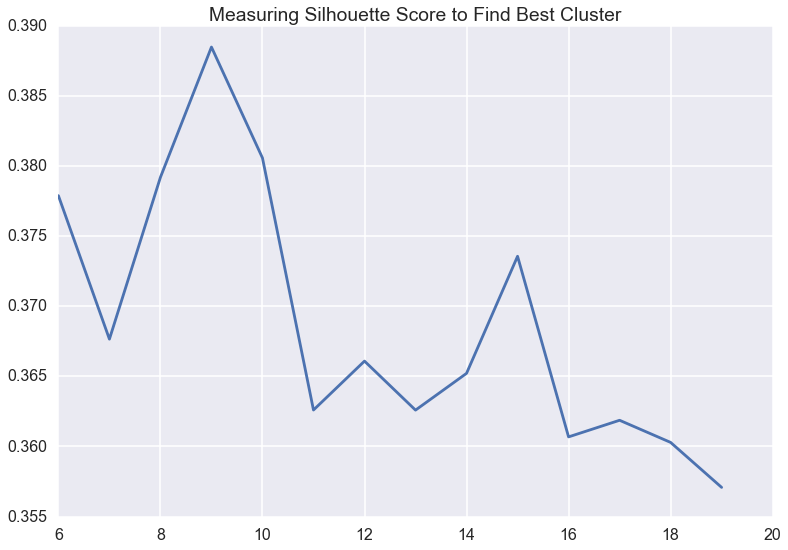

In [25]:
find_best_cluster(LDA_reduced_df,6,20)

### KMeans Clustering

In [17]:
kmeans = kmeans(LDA_reduced_df, 9)

In [18]:
# Assign labels
data['Cluster'] = kmeans['labels']

# Print silhouette score
print "silhouette score:", kmeans['silhouette_score']

silhouette score: 0.388468403716


#### Visualize the Scatter Plot

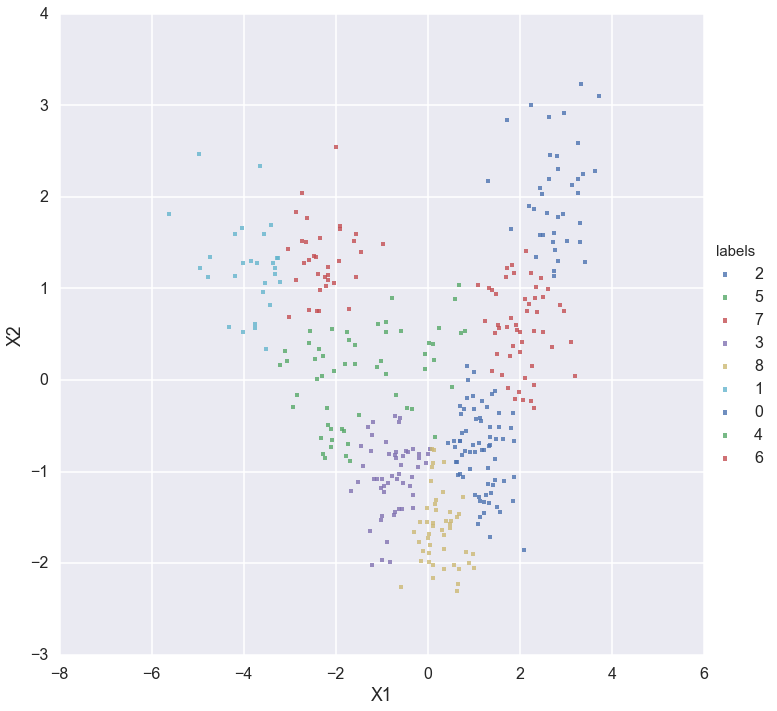

In [19]:
# Target labels
y = kmeans['labels']
df = pd.DataFrame({'X1':LDA_reduced_df[:,0],'X2':LDA_reduced_df[:,1], 'labels':y})

# Graph with Seaborn
sns.set_context("poster", font_scale=1)
graph = sns.lmplot('X1', 'X2', data=df, fit_reg=False, hue="labels", size=10, palette="deep", markers='s')

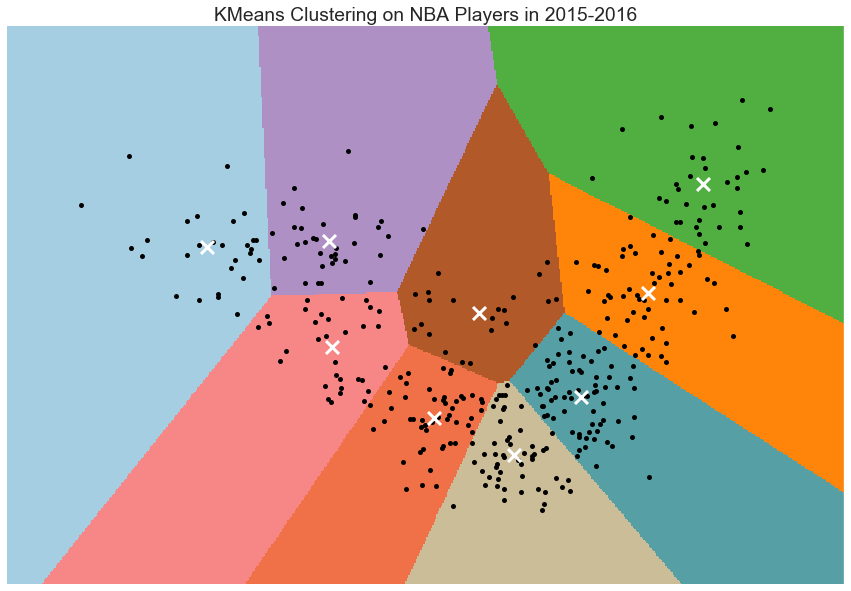

In [20]:
plot_kmeans_cluster(LDA_reduced_df, k_clusters=9, plot_title="""KMeans Clustering on NBA Players in 2015-2016""")

#### Investigate Clusters

In [21]:
data.head()

,Season,Player,Pos,G,PER,TS%,FTr,ORB%,DRB%,TRB%,...,3-10_FG%,10-16_FG%,16<3_FG%,3P%,%ASTd_2P,%FGA_DUNK,%ASTd_3P,%_CORNER3PA,3P%_CORNER3,Cluster
1,2016-17,Aaron Brooks,PG,46.0,10.3,0.505,0.128,2.4,6.4,4.4,...,0.441,0.640,0.375,0.337,0.103,0.000,0.529,0.119,0.417,2
2,2016-17,Aaron Gordon,SF,56.0,12.5,0.503,0.244,5.1,13.4,9.1,...,0.322,0.411,0.299,0.289,0.457,0.086,0.875,0.273,0.264,5
5,2016-17,Al Horford,C,45.0,17.6,0.541,0.155,4.6,17.9,11.2,...,0.426,0.366,0.500,0.351,0.592,0.053,0.985,0.139,0.296,5
6,2016-17,Al Jefferson,C,57.0,19.4,0.534,0.188,9.2,23.4,16.4,...,0.541,0.333,0.354,0.000,0.535,0.024,0.000,0.000,0.000,7
7,2016-17,Al-Farouq Aminu,SF,37.0,10.5,0.476,0.228,4.3,24.0,14.0,...,0.244,0.273,0.467,0.307,0.500,0.044,1.000,0.336,0.348,3


In [24]:
mask = (data['Cluster'] == 0)
data[mask][['Player']].head(15)

,Player
10,Alec Burks
11,Alex Abrines
24,Andrew Wiggins
28,Anthony Morrow
33,Arron Afflalo
43,Bojan Bogdanovic
45,Bradley Beal
48,Brandon Ingram
63,Caris LeVert
64,Carmelo Anthony


### Feature Importance for each Cluster

In [23]:
cluster_data = data[mask].drop(['Player', 'Pos', 'Season', 'Cluster'], axis=1)
league_data = data.drop(['Player', 'Pos', 'Season', 'Cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

,Feature,Importance,Cluster Average,League Average
0,OBPM,0.263555,-0.861765,-0.742794
1,VORP,0.261413,0.711765,0.556145
2,PER,0.260419,16.612745,13.887003
3,BPM,0.255775,0.333333,-0.831300
4,WS,0.254336,2.468627,2.257471
5,OWS,0.249421,1.436275,1.180371
6,%FGA_3P,0.246456,0.027529,0.315167
7,AST%,0.239548,11.194118,13.376481
8,USG%,0.223683,18.024510,18.900354
9,DWS,0.219399,1.043137,1.079399


### Cluster Descriptions
- Cluster 0: 
- Cluster 1:
- Cluster 2: 
- Cluster 3:
- Cluster 4:
- Cluster 5:
- Cluster 6:
- Cluster 7: 